<a href="https://colab.research.google.com/github/esramostafa20/Regression-Models-/blob/main/8_Support_Vector_Regression_(SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8. Support Vector Regression (SVR)

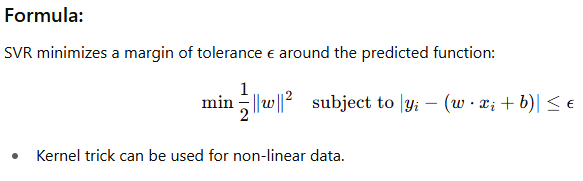

SVC tries to find the best boundary (hyperplane) that separates two classes (e.g., pass vs. fail).

Works well for both linear and non-linear relationships.

Can be used with different kernels:

"linear" → simple, fast

"rbf" (radial) → handles curves

"poly" → polynomial decision boundaries

## When to use:
1. When you want to handle non-linear relationships with kernels.

2. When robust to outliers.

3. When data is high-dimensional.

## When not to use:
1. Large datasets (can be slow).

2. When interpretability is a priority.

❌ SVM is NOT Easy to Interpret
Support Vector Machines:

Use mathematical distances from a hyperplane

Create boundaries in high-dimensional space

Often use non-linear kernels like rbf, where the decision function is very complex

You can’t easily explain:

“This student was predicted to pass because X, Y, Z…”

Unlike logistic regression (with clear coefficients), SVM doesn’t give you that.



In [ ]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/final_student_data.csv")  # Or use any built-in dataset
df.head()

,math score,reading score,writing score,total,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,218,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,247,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,278,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,148,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,229,True,False,True,False,False,False,False,False,True,False,True,True


In [ ]:
df['passed'] = (df['total'] >= 150).astype(int)


In [ ]:
X = df.drop(columns=['math score', 'reading score', 'writing score', 'total','passed'])  # or keep only relevant
y = df['passed']                 # binary target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Use radial kernel by default
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train, y_train)

# Predict labels
y_pred = svc.predict(X_test)

In [ ]:
# Predict labels
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.865


In [ ]:
# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  0  27]
 [  0 173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      1.00      0.93       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200

Accuracy: 0.865


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## A code for all kernels, to get the best one

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernels:
    print(f"\n--- Kernel: {k.upper()} ---")
    if k == 'poly':
        model = SVC(kernel=k, degree=3, probability=True)  # degree can be tuned
    else:
        model = SVC(kernel=k, probability=True)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))



--- Kernel: LINEAR ---
Accuracy: 0.865

--- Kernel: POLY ---
Accuracy: 0.865

--- Kernel: RBF ---
Accuracy: 0.865

--- Kernel: SIGMOID ---
Accuracy: 0.865


## Plotting our results

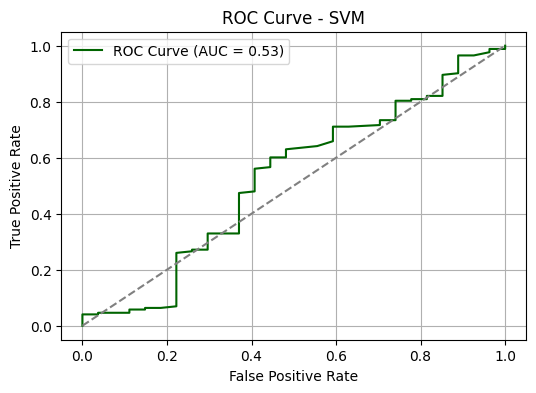

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = svc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid(True)
plt.show()


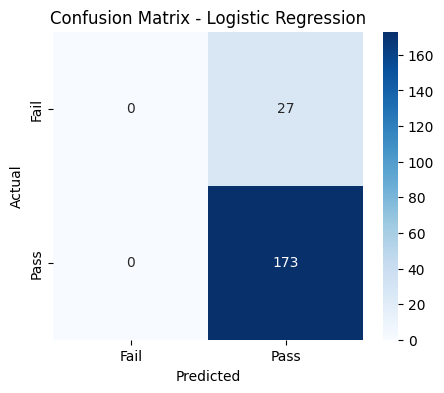

In [ ]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# 🧠 What Is a Kernel?
A kernel is a mathematical function that transforms your data into a higher-dimensional space so that it becomes linearly separable.

## ✅ Why do we need it?
Because:

1. Some datasets can’t be separated by a straight line (like a circle inside a circle)

2. SVM needs to find a hyperplane (straight boundary) to separate classes

3. A kernel allows SVM to find complex, curved decision boundaries without manually transforming your data

🎨 Simple Example (Visual)
Imagine this data in 2D:
🟠 = Class 0
🔵 = Class 1



🔵🔵🔵
🔵🟠🔵
🔵🔵🔵


There’s no straight line that can cleanly separate 🟠 and 🔵.

But if you transform the data into a new space (e.g., 3D), now a plane can separate them.

The kernel function does that for you automatically, behind the scenes.

## Common Kernel Types in SVM

1. Linear	No transformation; finds straight-line separation	When data is already linearly separable

2. RBF (Radial Basis Function)	Transforms data using Gaussian similarity	When classes are not linearly separable

3. Polynomial	Transforms to curved boundaries using polynomials	When relationships involve curved interactions

4. Sigmoid	Like a neural network activation function	Rarely used; not common in practice